In [1]:
%matplotlib inline
from utils import *
from plotting import *
from models import *

In [2]:
tasks = ['doubleTmaze', 'cylinder', 'permanence', 'thorndike']

In [3]:
task = tasks[0]

dataset, position = load_dataset(directory='datasets/'+task, task=task)
train_loader = create_dataloader(dataset, batch_size=256, reshuffle_after_epoch=True)

In [4]:
load_model = True

model = Conv_AE(n_hidden=1000).to('cuda')
if load_model:
    model.load_state_dict(torch.load('saved_models/main_{}_sparse-AE_1000hidden.pth'.format(task)))

In [51]:
results = train_autoencoder(model, train_loader, dataset, opt=optim.Adam, 
                            num_epochs=2000, learning_rate=1e-4, alpha=1e3) 

Epoch 64/2000, Loss: 0.0007: 100%|█████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.98it/s]


Epoch 128/2000, Loss: 0.0007: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.74it/s]


Epoch 192/2000, Loss: 0.0007: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.92it/s]


Epoch 256/2000, Loss: 0.0007: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.44it/s]


Epoch 283/2000, Loss: 0.0005:  68%|████████████████████████████████████████▌                   | 27/40 [00:01<00:00, 15.09it/s]


KeyboardInterrupt: 

In [6]:
history = results['loss']

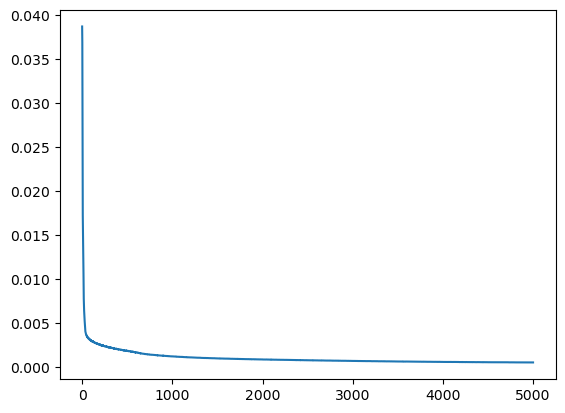

In [7]:
plt.plot(history)
plt.show()

In [30]:
torch.save(model.state_dict(), 'saved_models/main_{}_sparse-AE_1000hidden.pth'.format(task))

In [5]:
embeddings = get_latent_vectors(dataset, model)
embeddings[embeddings<1e-5] = 0

In [6]:
ratemaps = generate_ratemaps(embeddings, position, n_bins=60, filter_width=4, n_bins_padding=10)

In [7]:
cleaned_ratemaps = clean_ratemaps(ratemaps)

In [8]:
cleaned_ratemaps.shape

(842, 80, 80)

In [39]:
plot_ratemaps(cleaned_ratemaps[0:100])

In [40]:
plot_ratemaps(cleaned_ratemaps[100:200])

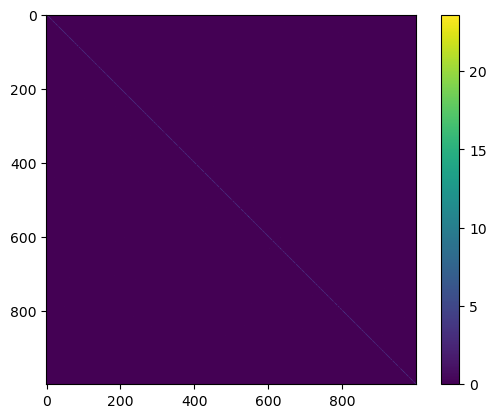

In [17]:
plt.imshow(np.dot(embeddings.T, embeddings))
plt.colorbar()
plt.show()

In [9]:
all_num_fields, all_centroids, all_sizes = stats_place_fields(cleaned_ratemaps, 
                                                              min_pix_cluster=0.03, max_pix_cluster=0.5, active_threshold=0.2)

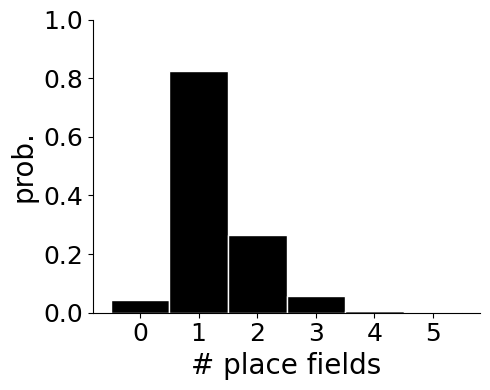

In [10]:
plot_place_field_hist(all_num_fields)

In [11]:
plot_ratemaps_with_centroids(cleaned_ratemaps, all_num_fields, all_centroids)

In [7]:
task = tasks[3]
dataset, position = load_dataset(directory='datasets/'+task, task=task)
train_loader = create_dataloader(dataset, batch_size=256, reshuffle_after_epoch=True)
model = Conv_AE(n_hidden=1000).to('cuda')
model.load_state_dict(torch.load('saved_models/main_{}_sparse-AE_1000hidden.pth'.format(task)))
print( get_predictions(model, train_loader)[1] )

0.0005477259313687682


## Barcodes

In [28]:
plt.figure(figsize=(20,20), dpi=600)
cleaned_embeddings = clean_embeddings(embeddings)
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(cleaned_ratemaps[i], cmap='hot', origin='lower')
    x, y = position[np.argmax(cleaned_embeddings[:,i])]
    plt.scatter(x, y, marker='x', c='blue', s=150)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [29]:
plt.figure(figsize=(20,20), dpi=600)
cleaned_embeddings = clean_embeddings(embeddings)
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(cleaned_ratemaps[100+i], cmap='hot', origin='lower')
    x, y = position[np.argmax(cleaned_embeddings[:,100+i])]
    plt.scatter(x, y, marker='x', c='blue', s=150)
    plt.axis('off')
plt.tight_layout()
plt.show()

### Training across tasks

In [3]:
losses = []
for task in tasks:
    print(task)
    dataset, position = load_dataset(directory='datasets/'+task, task=task)
    train_loader = create_dataloader(dataset, batch_size=256, reshuffle_after_epoch=True)
    
    model = Conv_AE(n_hidden=1000).to('cuda')
    
    results = train_autoencoder(model, train_loader, dataset, opt=optim.Adam, 
                                num_epochs=5000, learning_rate=1e-4, alpha=0, loss_threshold=0.0006) 
    
    losses.append( results['loss'][-1] )
    
    torch.save(model.state_dict(), 'saved_models/main_{}_AE_1000hidden.pth'.format(task))

doubleTmaze


Epoch 64/5000, Loss: 0.0029: 100%|█████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.79it/s]


Epoch 128/5000, Loss: 0.0020: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.34it/s]


Epoch 192/5000, Loss: 0.0016: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.21it/s]


Epoch 256/5000, Loss: 0.0014: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.56it/s]


Epoch 320/5000, Loss: 0.0013: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.66it/s]


Epoch 384/5000, Loss: 0.0012: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.02it/s]


Epoch 448/5000, Loss: 0.0011: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.21it/s]


Epoch 512/5000, Loss: 0.0011: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.59it/s]


Epoch 576/5000, Loss: 0.0010: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.53it/s]


Epoch 640/5000, Loss: 0.0010: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 15.32it/s]


Epoch 704/5000, Loss: 0.0009: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.80it/s]


Epoch 768/5000, Loss: 0.0009: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.83it/s]


Epoch 832/5000, Loss: 0.0009: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.15it/s]


Epoch 896/5000, Loss: 0.0008: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.82it/s]


Epoch 960/5000, Loss: 0.0008: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.13it/s]


Epoch 1024/5000, Loss: 0.0008: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.13it/s]


Epoch 1088/5000, Loss: 0.0008: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.24it/s]


Epoch 1152/5000, Loss: 0.0008: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 19.31it/s]


Epoch 1216/5000, Loss: 0.0007: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 19.28it/s]


Epoch 1280/5000, Loss: 0.0007: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 15.06it/s]


Epoch 1344/5000, Loss: 0.0007: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.54it/s]


Epoch 1408/5000, Loss: 0.0007: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.35it/s]


Epoch 1472/5000, Loss: 0.0007: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.42it/s]


Epoch 1536/5000, Loss: 0.0007: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.18it/s]


Epoch 1600/5000, Loss: 0.0007: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.83it/s]


Epoch 1664/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.76it/s]


Epoch 1728/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.51it/s]


Epoch 1792/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.33it/s]


Epoch 1856/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.32it/s]


Epoch 1902/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.23it/s]


Stopping early at epoch 1902 as loss 0.0006 is below the threshold 0.0006.
cylinder


Epoch 64/5000, Loss: 0.0022: 100%|█████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.46it/s]


Epoch 128/5000, Loss: 0.0016: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.43it/s]


Epoch 192/5000, Loss: 0.0013: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.29it/s]


Epoch 256/5000, Loss: 0.0012: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.47it/s]


Epoch 320/5000, Loss: 0.0011: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.56it/s]


Epoch 384/5000, Loss: 0.0010: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.53it/s]


Epoch 448/5000, Loss: 0.0009: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.47it/s]


Epoch 512/5000, Loss: 0.0009: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.72it/s]


Epoch 576/5000, Loss: 0.0009: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.80it/s]


Epoch 640/5000, Loss: 0.0008: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.75it/s]


Epoch 704/5000, Loss: 0.0008: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.29it/s]


Epoch 768/5000, Loss: 0.0007: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 15.59it/s]


Epoch 832/5000, Loss: 0.0007: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.32it/s]


Epoch 896/5000, Loss: 0.0007: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.81it/s]


Epoch 960/5000, Loss: 0.0007: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.05it/s]


Epoch 1024/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.80it/s]


Epoch 1088/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.07it/s]


Epoch 1091/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.94it/s]


Stopping early at epoch 1091 as loss 0.0006 is below the threshold 0.0006.
permanence


Epoch 64/5000, Loss: 0.0020: 100%|█████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.79it/s]


Epoch 128/5000, Loss: 0.0016: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.34it/s]


Epoch 192/5000, Loss: 0.0014: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.20it/s]


Epoch 256/5000, Loss: 0.0012: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.79it/s]


Epoch 320/5000, Loss: 0.0011: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.67it/s]


Epoch 384/5000, Loss: 0.0010: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.78it/s]


Epoch 448/5000, Loss: 0.0010: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.72it/s]


Epoch 512/5000, Loss: 0.0009: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 19.12it/s]


Epoch 576/5000, Loss: 0.0009: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.89it/s]


Epoch 640/5000, Loss: 0.0008: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 19.16it/s]


Epoch 704/5000, Loss: 0.0008: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.12it/s]


Epoch 768/5000, Loss: 0.0008: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.04it/s]


Epoch 832/5000, Loss: 0.0007: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.63it/s]


Epoch 896/5000, Loss: 0.0007: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.77it/s]


Epoch 960/5000, Loss: 0.0007: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.62it/s]


Epoch 1024/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.38it/s]


Epoch 1088/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.58it/s]


Epoch 1124/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.91it/s]


Stopping early at epoch 1124 as loss 0.0006 is below the threshold 0.0006.
thorndike


Epoch 64/5000, Loss: 0.0022: 100%|█████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.47it/s]


Epoch 128/5000, Loss: 0.0017: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.03it/s]


Epoch 192/5000, Loss: 0.0014: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 19.35it/s]


Epoch 256/5000, Loss: 0.0013: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.12it/s]


Epoch 320/5000, Loss: 0.0012: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.96it/s]


Epoch 384/5000, Loss: 0.0011: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.62it/s]


Epoch 448/5000, Loss: 0.0010: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.34it/s]


Epoch 512/5000, Loss: 0.0010: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 19.39it/s]


Epoch 576/5000, Loss: 0.0009: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.03it/s]


Epoch 640/5000, Loss: 0.0009: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.20it/s]


Epoch 704/5000, Loss: 0.0009: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.74it/s]


Epoch 768/5000, Loss: 0.0008: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.89it/s]


Epoch 832/5000, Loss: 0.0008: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.32it/s]


Epoch 896/5000, Loss: 0.0007: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.95it/s]


Epoch 960/5000, Loss: 0.0007: 100%|████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.33it/s]


Epoch 1024/5000, Loss: 0.0007: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.57it/s]


Epoch 1088/5000, Loss: 0.0007: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 19.50it/s]


Epoch 1152/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.99it/s]


Epoch 1216/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.01it/s]


Epoch 1280/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.20it/s]


Epoch 1286/5000, Loss: 0.0006: 100%|███████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.82it/s]


Stopping early at epoch 1286 as loss 0.0006 is below the threshold 0.0006.


In [4]:
print(losses)

[0.0005999030414386653, 0.0005993950457195751, 0.0005984810661175289, 0.000599686845089309]
